In [15]:
!pip install hopsworks

In [2]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams["axes.labelsize"] = 14.
plt.rcParams["xtick.labelsize"] = 12.
plt.rcParams["ytick.labelsize"] = 12.
plt.rcParams["legend.fontsize"] = 10.

<ipython-input-2-ed138f5cb1b2>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [3]:
import hopsworks
import pandas as pd

In [4]:
project = hopsworks.login()
fs = project.get_feature_store()

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/371861
Connected. Call `.close()` to terminate connection gracefully.


In [6]:
import requests
import io
from datetime import date, timedelta

def get_earthquakes(date=date.today()):
    params = {
        'format': 'csv',
        'starttime': date - timedelta(days=1),
        'endtime': date
    }

    r = requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query', params=params)
    earthquakes_df = pd.read_csv(io.StringIO(r.text))

    return earthquakes_df


def filter_earthquakes(df):
    df.dropna(inplace=True)
    df = df[['id', 'time', 'latitude', 'longitude', 'depth', 'depthError', 'rms', 'status', 'type', 'mag']]
    df = df[df.type == 'earthquake']
    df['reviewed'] = (df['status'] == 'reviewed').astype(float)
    df.drop(columns=['type', 'status'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename(columns={'depthError': 'deptherror'}, inplace=True)
    return df

earthquakes_df = pd.concat([filter_earthquakes(get_earthquakes(date(2023, 12, 31) - timedelta(i))) for i in range(2 * 365)])
earthquakes_df

,id,time,latitude,longitude,depth,deptherror,rms,mag,reviewed
0,nc73983176,2023-12-30T23:58:23.030Z,38.816002,-122.779831,7.450000,8.260000,0.03,0.28,0.0
1,nc73983171,2023-12-30T23:58:11.240Z,38.824165,-122.787498,0.590000,0.310000,0.04,1.49,0.0
2,us6000m0qv,2023-12-30T23:55:47.712Z,44.428000,148.969800,35.000000,1.993000,0.44,4.40,1.0
3,ci40452871,2023-12-30T23:48:50.890Z,34.292667,-117.932833,10.460000,0.370000,0.17,1.63,1.0
4,ci40452863,2023-12-30T23:40:32.070Z,33.241500,-116.334333,9.320000,0.540000,0.20,1.25,0.0
...,...,...,...,...,...,...,...,...,...
151,tx2021zpem,2021-12-31T01:41:54.321Z,31.757267,-104.586923,5.848779,1.151288,0.20,3.50,1.0
152,nc73669361,2021-12-31T01:38:40.450Z,38.841667,-122.810837,1.270000,2.160000,0.01,1.12,0.0
153,mb80534869,2021-12-31T01:22:41.150Z,44.333667,-115.197500,10.330000,1.440000,0.21,2.29,1.0
154,nc73669346,2021-12-31T00:12:38.420Z,37.834000,-122.036167,9.530000,0.210000,0.07,1.50,1.0


In [7]:
earthquakes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130683 entries, 0 to 155
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          130683 non-null  object 
 1   time        130683 non-null  object 
 2   latitude    130683 non-null  float64
 3   longitude   130683 non-null  float64
 4   depth       130683 non-null  float64
 5   deptherror  130683 non-null  float64
 6   rms         130683 non-null  float64
 7   mag         130683 non-null  float64
 8   reviewed    130683 non-null  float64
dtypes: float64(7), object(2)
memory usage: 10.0+ MB


In [8]:
earthquakes_df.describe()

,latitude,longitude,depth,deptherror,rms,mag,reviewed
count,130683.000000,130683.000000,130683.000000,130683.000000,130683.000000,130683.000000,130683.000000
mean,31.242278,-86.025161,23.797003,2.211833,0.242163,1.929189,0.885318
std,19.022308,84.325642,68.513838,3.962064,0.258879,1.467975,0.318639
min,-65.849700,-179.999700,-3.500000,0.080000,0.000000,-1.410000,0.000000
25%,32.737667,-122.748497,3.080000,0.470000,0.070000,0.800000,1.000000
50%,36.541000,-117.116500,7.950000,0.802956,0.140000,1.400000,1.000000
75%,38.834835,-104.306179,12.750000,1.918000,0.300000,2.800000,1.000000
max,86.647700,179.999400,681.238000,67.300000,3.090000,7.800000,1.000000


In [9]:
earthquakes_df.isnull().sum()

id            0
time          0
latitude      0
longitude     0
depth         0
deptherror    0
rms           0
mag           0
reviewed      0
dtype: int64

### Exploratory Data Analysis (EDA) of Earthquake Data

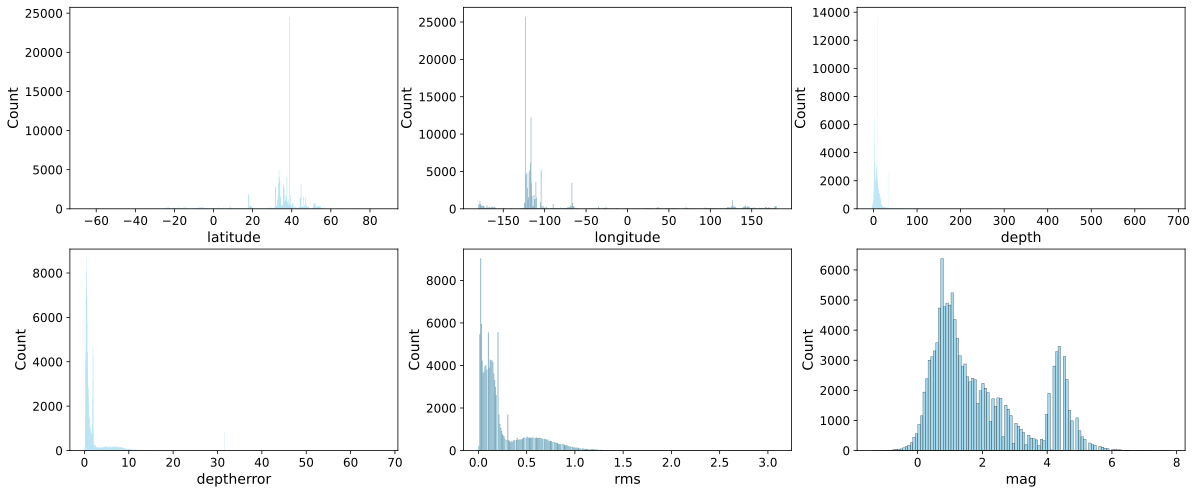

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
for ax, feature in zip(axes.flat, earthquakes_df.columns[2:-1]):
    sns.histplot(earthquakes_df[feature], color='skyblue', ax=ax)
plt.show();

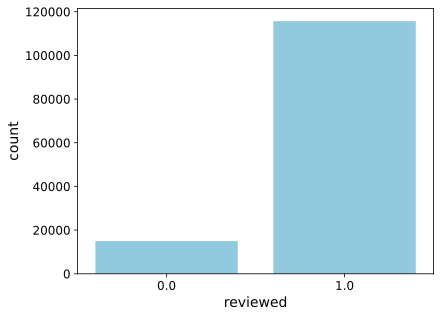

In [13]:
sns.countplot(earthquakes_df, x='reviewed', color='skyblue')
plt.show();

### Insert our Earthquakes DataFrame into a FeatureGroup

In [14]:
earthquakes_fg = fs.get_or_create_feature_group(
    name="earthquakes",
    version=1,
    primary_key=['id']
)
earthquakes_fg.insert(earthquakes_df)